# Task 3 : Prodigy Infotechhh

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

In [7]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Reading csv File
data = pd.read_csv(r"C:\Users\pattn\Downloads\PRODIGY_DS\PRODIGY_DS_03-main\PRODIGY_DS_03-main\bank data.csv", sep=';')

In [9]:
# Displaying First File
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Displaying the shape of the dataset
data.shape

(41188, 21)

In [11]:

# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# Checking Missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# Checking for duplicates
data.duplicated().sum()

12

In [14]:
# Investigating these 12 duplicates
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


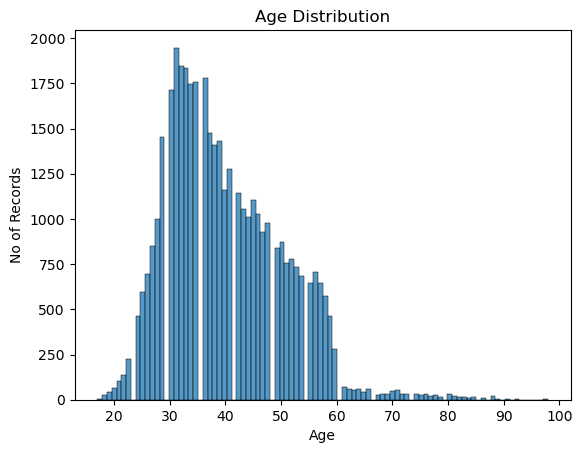

In [15]:
# Plotting age distribution in the dataset
sns.histplot(x="age", data=data)
plt.xlabel("Age")
plt.ylabel("No of Records")
plt.title("Age Distribution")
plt.show()

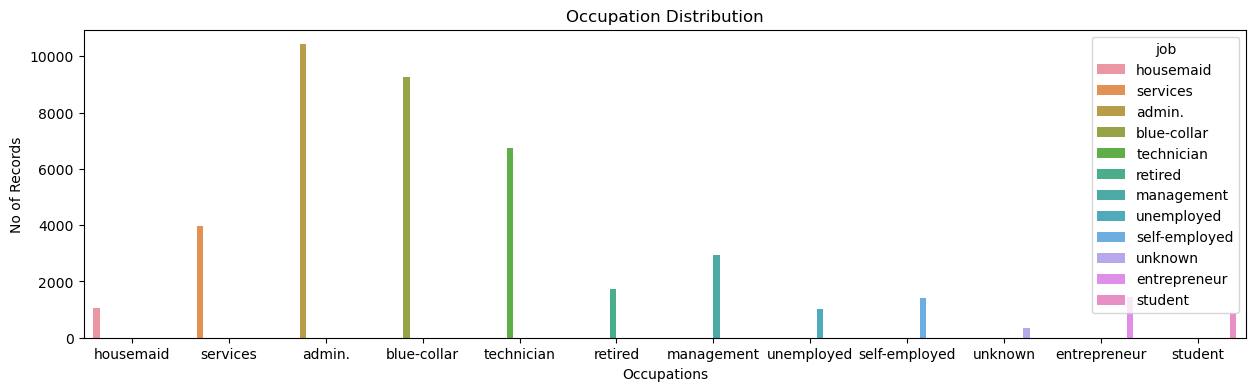

In [16]:
# Plotting occupation distribution in the dataset
plt.figure(figsize=(15,4))
sns.countplot(x="job",hue='job',data=data)
plt.xlabel("Occupations")
plt.ylabel("No of Records")
plt.title("Occupation Distribution")
plt.show()

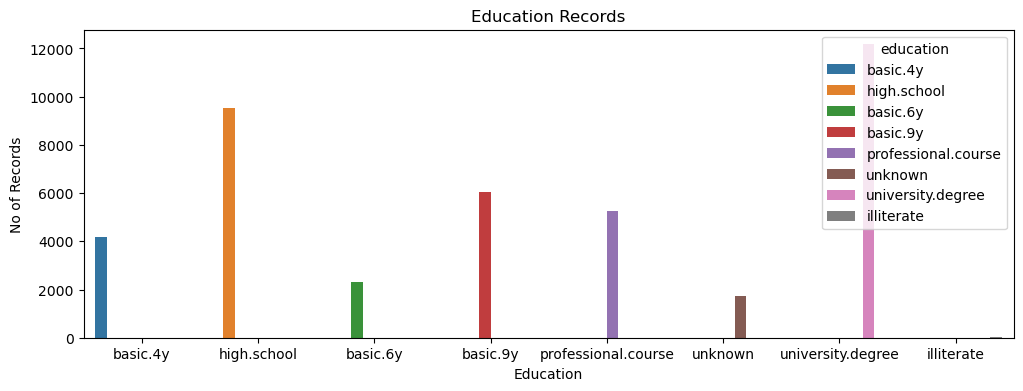

In [17]:
# Plotting education records
plt.figure(figsize=(12,4))
sns.countplot(x="education",hue='education',data=data)
plt.xlabel("Education")
plt.ylabel("No of Records")
plt.title("Education Records")
plt.show()

In [18]:
# Default values count
data.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

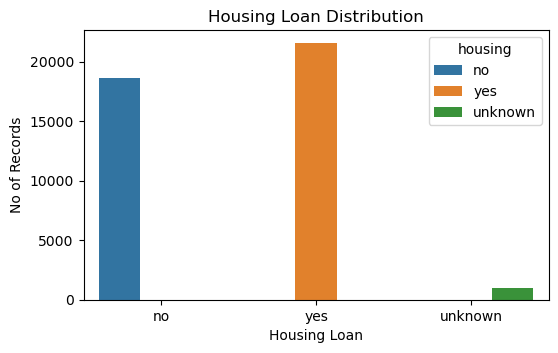

In [19]:
# Plottinh housing loan distribution
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", hue='housing',data= data)
plt.xlabel("Housing Loan")
plt.ylabel("No of Records")
plt.title("Housing Loan Distribution")
plt.show()

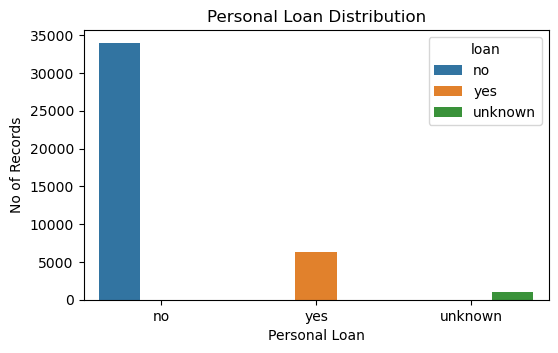

In [20]:
# Plottinh personal loan distribution
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", hue='loan', data= data)
plt.xlabel("Personal Loan")
plt.ylabel("No of Records")
plt.title("Personal Loan Distribution")
plt.show()

In [21]:
#labelling categorical variables
cols = data.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [22]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
# Scaling the data 
le = LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)

In [24]:
# Displaying the first 3 rows
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


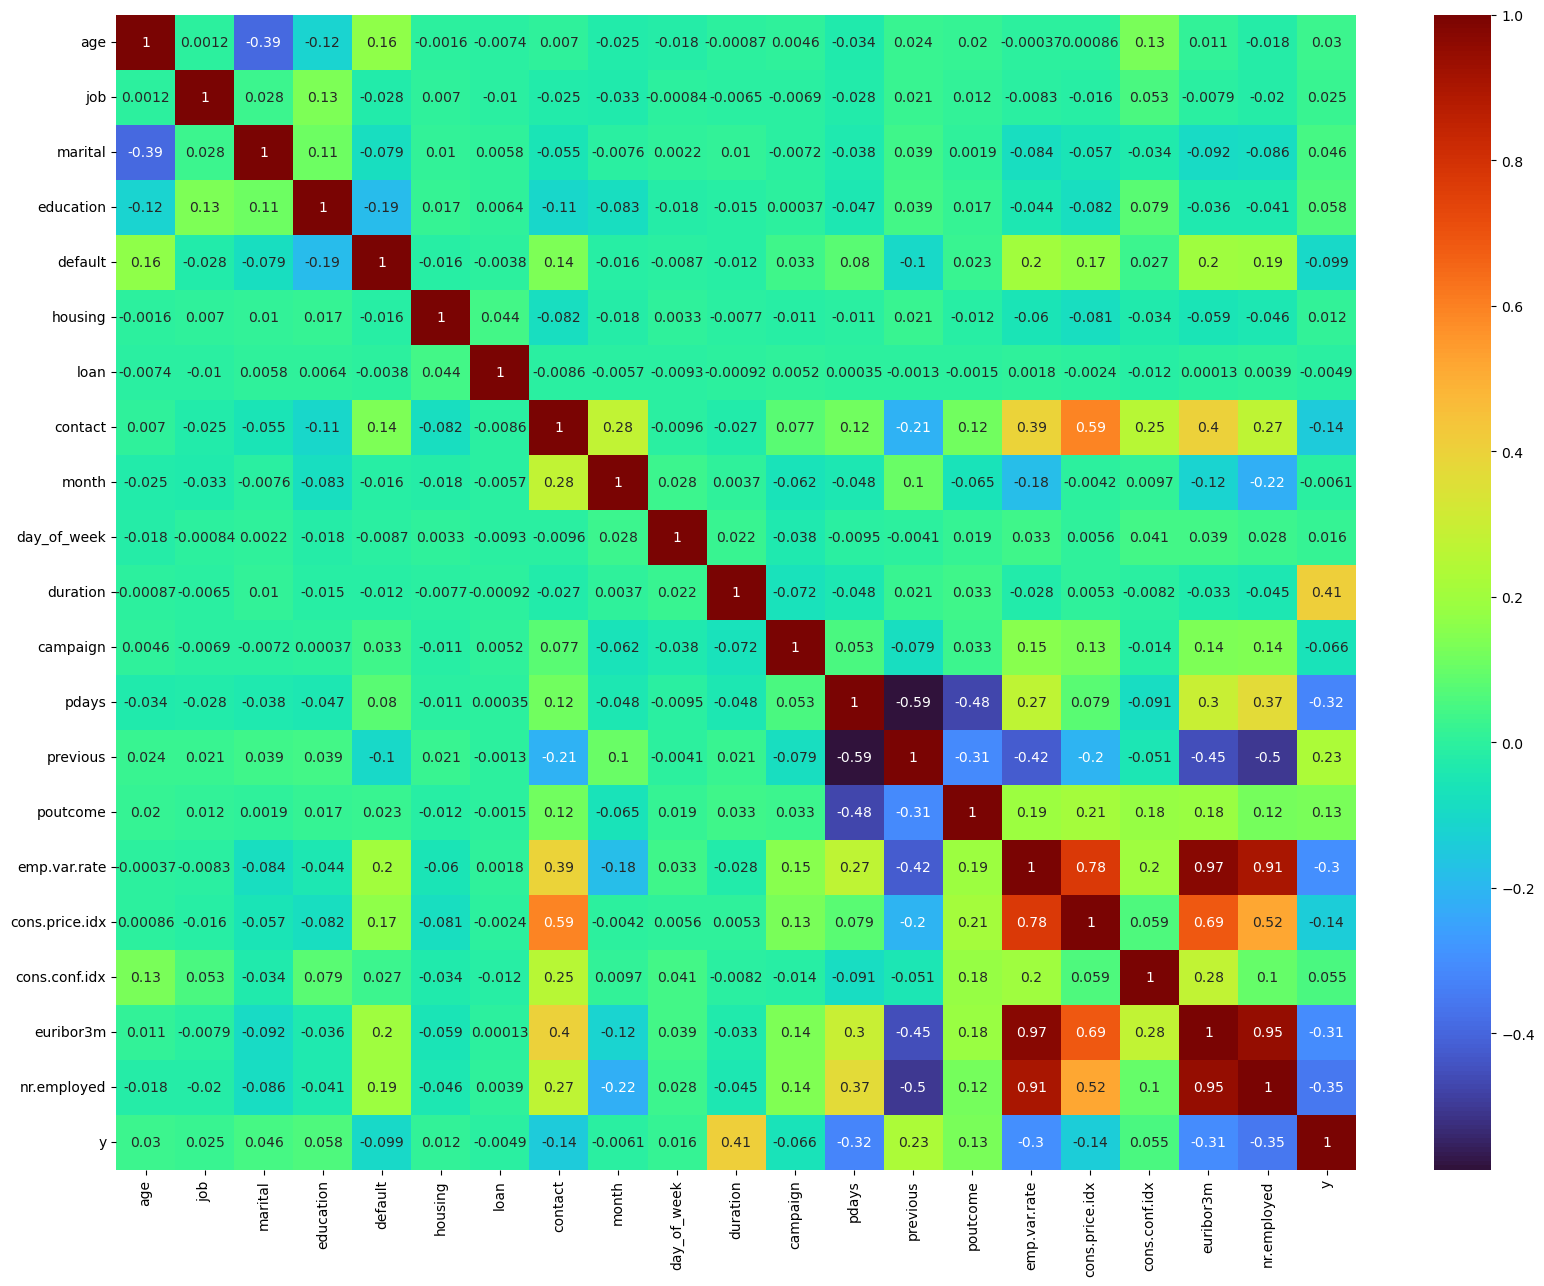

In [25]:
# Displaying correlation using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cmap='turbo', annot=True)
plt.show()

In [26]:
# Splitting input and output
X = data.drop("y", axis=1)
y = data.y

In [27]:
# Using fit_transform using standardscaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [28]:
# Importing libraries for decision tree, classification, confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:
# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [30]:
# Using the decisiontreeclassifier method
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [31]:
# Printing Scores
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))  

Train Score: 1.0
Test Score: 0.8916403657845755


In [32]:
#Training and testing using multiple folds
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8859906986904633

In [33]:
# Predicting values such as precision, recall, f1-score, support
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10938
           1       0.53      0.54      0.53      1419

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.74     12357
weighted avg       0.89      0.89      0.89     12357



In [34]:
# Assigning characteristics
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [35]:
# Importing library
from sklearn.model_selection import GridSearchCV

In [36]:
# Hyperparameter tuning using gridsearchcv
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [37]:
# Best parameters
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

In [38]:
# Best estimater
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [39]:
# Average of cross validation
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.9123857492673789

In [40]:
# Decisiontreeclassifier using gini impurity
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [41]:
# Printing scores
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9148832853525719
Test Score: 0.9169701383831027


In [42]:
# Predicting test data
pred_y = clf.predict(test_X)

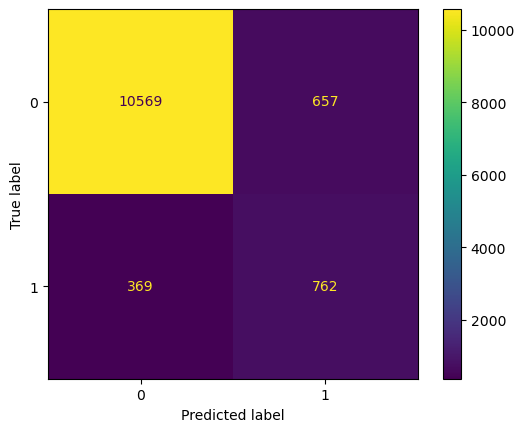

In [43]:
# Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()